In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

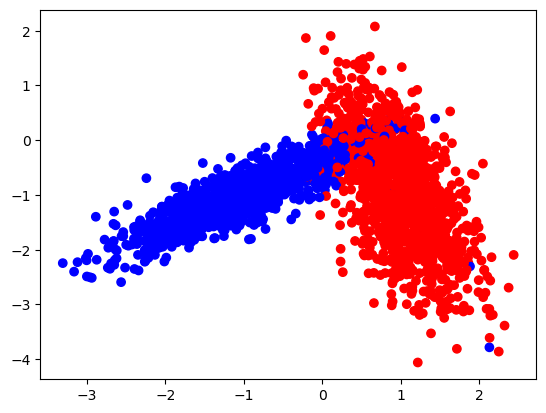

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#colors = {0:'red', 1:'blue'}
colo=['red','blue']
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap=ListedColormap(colo))
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.pyplot as plt

In [64]:
def random_k(param_range):
    values=random.sample(range(1,param_range),10)
    values.sort()
    return values

def cv_indices(j,folds):
    l=len(X_train)//folds
    #return list(range((j*l),(j+1)*l))
    if j==0:
        return list(range((j*l),((j+1)*l)+1))
    elif j==2:
        return list(range((j*l)+1,(j+1)*l))
    return list(range((j*l)+1,((j+1)*l)+1))
    
    
def RandomSearchCV(x_train,y_train,classifier,param_range,folds):
    trainscores = []
    testscores  = []
    
    param_list=random_k(param_range)
    for k in tqdm(param_list):
        trainscores_folds = []
        testscores_folds  = []
        
        for j in range(0,folds):
            test_indices=cv_indices(j,folds)
            train_indices=list(set(range(0,len(x_train))) - set(test_indices))
            
            X_train=x_train[train_indices]
            X_test=x_train[test_indices]
            Y_train=y_train[train_indices]
            Y_test=y_train[test_indices]
            
                               
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            
            Y_predicted=classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))                   
                              
            Y_predicted=classifier.predict(X_train)                   
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))                  
        trainscores.append(np.mean(trainscores_folds))
        testscores.append(np.mean(testscores_folds))
    return trainscores,testscores,param_list


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.61it/s]

param_list:
 [1, 6, 12, 18, 20, 33, 35, 43, 44, 47]

testscores:
 [0.9302671392640756, 0.9520002614827087, 0.955600368576059, 0.9542667684693497, 0.9545335418880333, 0.9560003152640504, 0.9566668219946916, 0.9572001553706916, 0.9573335421013668, 0.9570668753920334]

trainscores:
 [1.0, 0.9600000389466681, 0.9582666388853323, 0.9581335455520085, 0.9578002522053435, 0.9576000788746698, 0.9577334388746709, 0.957800025552001, 0.9579333988880027, 0.9576666788773339]


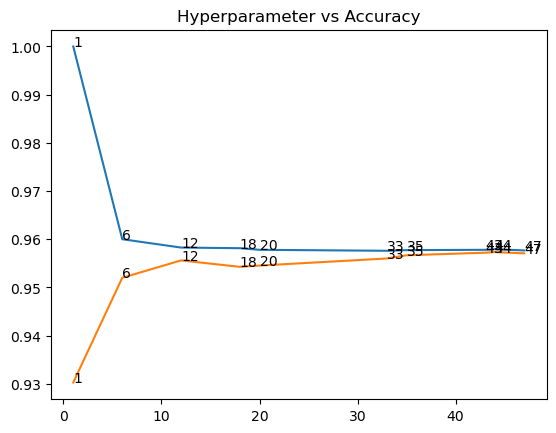

In [80]:
import warnings
warnings.filterwarnings("ignore")

param_range = 50
folds = 3

neigh=KNeighborsClassifier()

trainscores,testscores,param_list = RandomSearchCV(X_train,y_train,neigh,param_range,folds)
print('param_list:\n',param_list)
print('\ntestscores:\n',testscores)
print('\ntrainscores:\n',trainscores)

plt.figure()
plt.plot(param_list,trainscores,label='train cruve')
plt.plot(param_list,testscores,label='test cruve')

for i in range(0,len(param_list)):
    plt.annotate(str(param_list[i]),xy=(param_list[i],testscores[i]))
    plt.annotate(str(param_list[i]),xy=(param_list[i],trainscores[i]))

plt.title('Hyperparameter vs Accuracy')
plt.show()


In [77]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

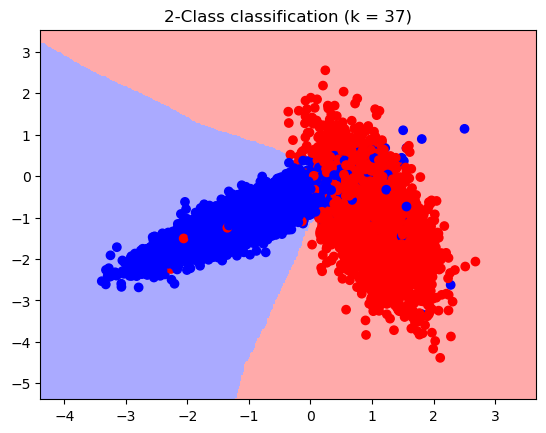

In [78]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 37)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

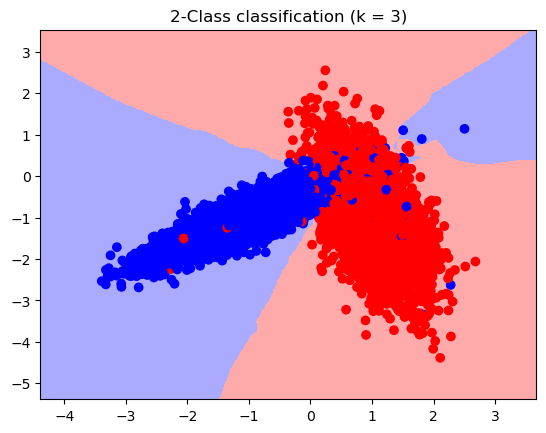

In [82]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)